In [1]:
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
import random
from functools import reduce
import matplotlib.pyplot as plt
from operator import concat
from torchvision import transforms as TR
from torchvision import datasets, transforms
from torch.utils.data import ChainDataset, DataLoader, Sampler
from torch.utils.data.dataset import ConcatDataset
import torchvision
import torch
from tqdm import tqdm
import torch.nn.functional as F
from collections import defaultdict
import yaml
import pandas as pd
import importlib
from utils import *
from Experiment1 import *

In [12]:
config_file = 'config.yaml'

with open(config_file) as cf_file:
    config = yaml.safe_load( cf_file.read())
    
object_path = importlib.import_module('data_loaders.' + config['stage_1']['datasets']['objects'])
data_object = getattr(object_path,config['stage_1']['datasets']['objects'])
object_dataset = data_object(config_file)

objects_train = object_dataset.getDataset("train")
objects_val = object_dataset.getDataset("val")
objects_test = object_dataset.getDataset("test")

dataloader_train = DataLoader(objects_train, batch_size=64)
dataloader_val = DataLoader(objects_val, batch_size=64)
dataloader_test = DataLoader(objects_test, batch_size=64)

In [17]:
def visualize_example_batch(dataloader, batch_size=64):
        '''
        Visualize example images from the first batch of the passed in dataloader
        '''
        examples = enumerate(dataloader)
        batch_idx, (data, targets) = next(examples)
        fig = plt.figure(figsize=(15, 15))
        for i in range(64):
            plt.subplot(8,8,i+1)
            # plt.tight_layout()
            plt.imshow(data[i].permute(1,2,0), interpolation='none')
            plt.title("ground truth: {}".format(targets[i]))
            plt.xticks([])
            plt.yticks([])

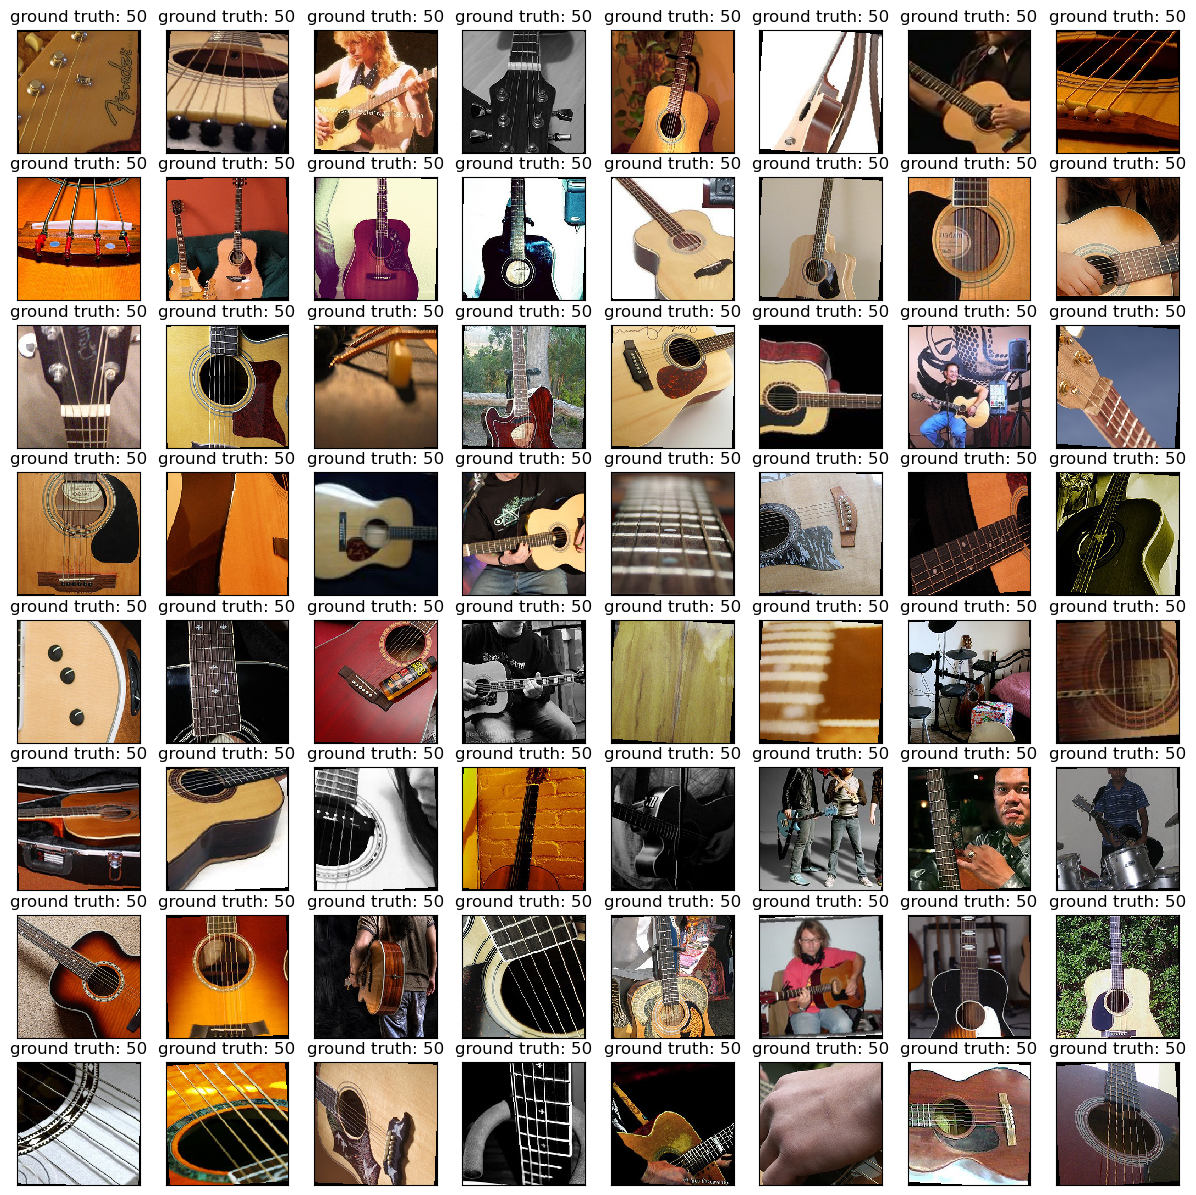

In [21]:
visualize_example_batch(dataloader_train)

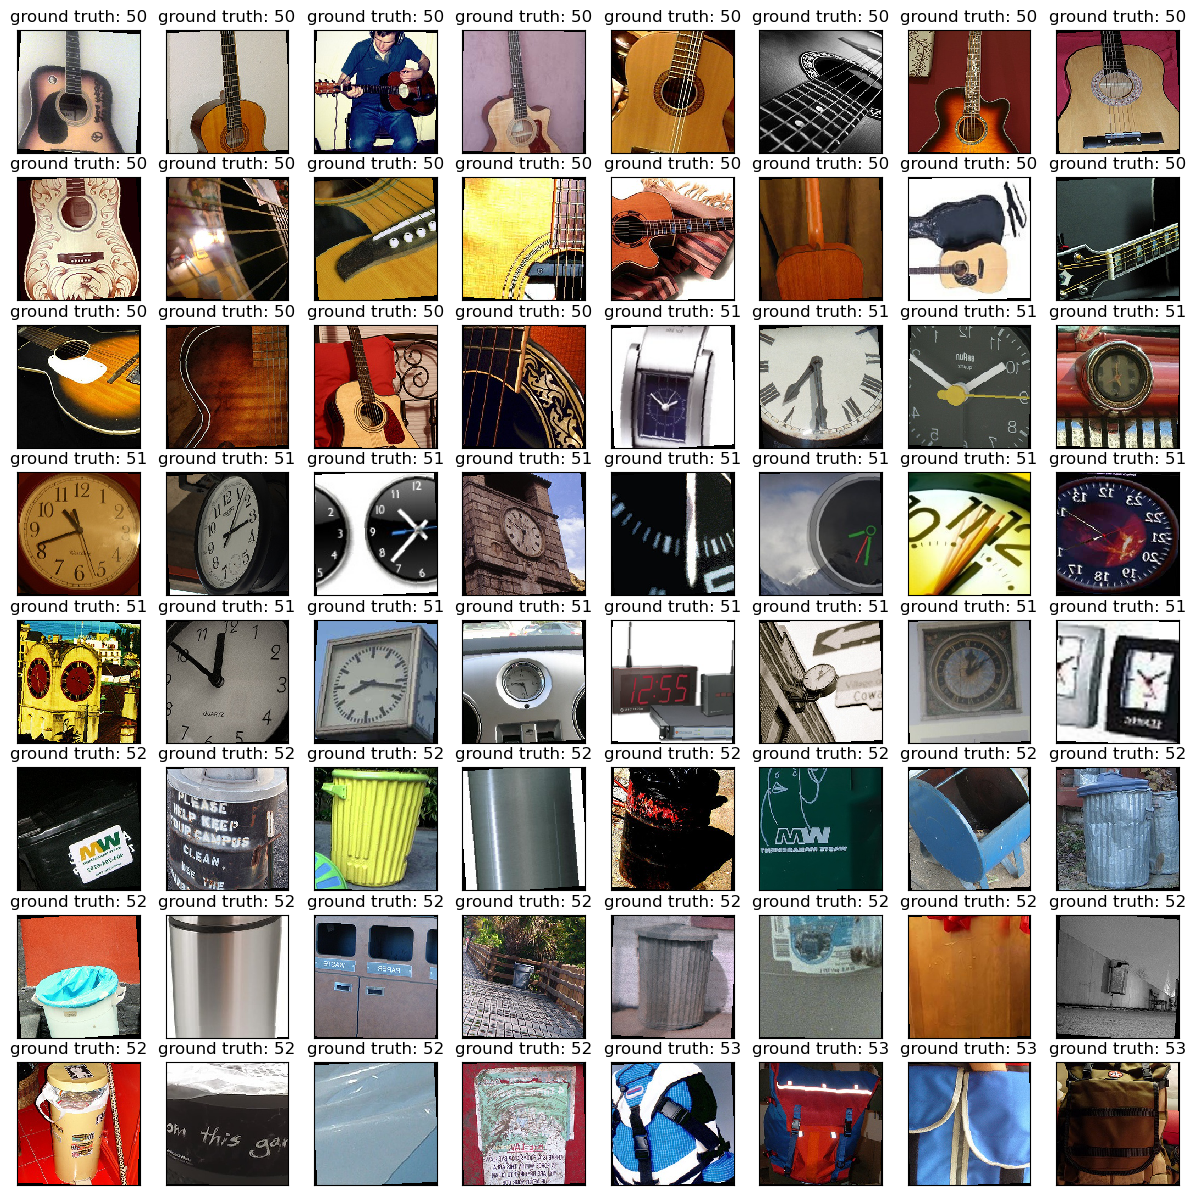

In [19]:
visualize_example_batch(dataloader_val)